Columns: Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Model Performance
R2 Score: 0.899438024100912
RMSE: 1.7815996615334502

Advertising Impact:
     Feature    Impact
1      Radio  0.189195
0         TV  0.044730
2  Newspaper  0.002761


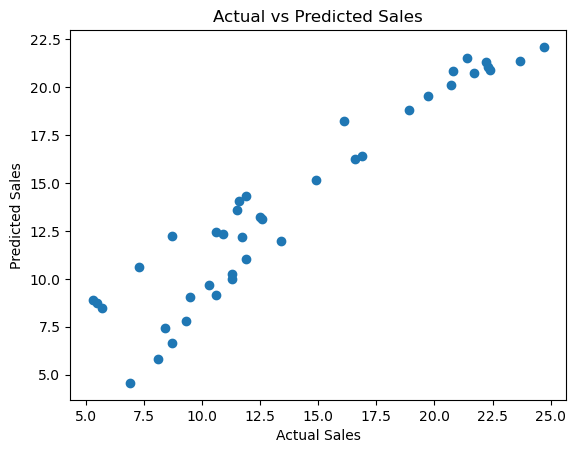


Predicted Future Sales: [14.4735936]


In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("Advertising.csv")   # file name change if needed

df.columns = df.columns.str.replace('#', '')
print("Columns:", df.columns)

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

impact = pd.DataFrame({
    "Feature": X.columns,
    "Impact": model.coef_
})

print("\nAdvertising Impact:")
print(impact.sort_values(by="Impact", ascending=False))

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

new_data = pd.DataFrame([[150, 25, 20]],
                        columns=['TV', 'Radio', 'Newspaper'])

future_sales = model.predict(new_data)

print("\nPredicted Future Sales:", future_sales)